In [1]:
import matplotlib.pyplot as plt

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, labels = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state = 42, 
)

In [3]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
kmeans = KMeans(
    init = 'random',
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42,
    verbose = 2
)
kmeans.fit(scaled_features)

Initialization complete
Iteration 0, inertia 255.03520544860422
Iteration 1, inertia 168.33255006393188
Iteration 2, inertia 165.1136065058592
Iteration 3, inertia 164.3553837160452
Iteration 4, inertia 164.32122705444965
Iteration 5, inertia 164.26127036179844
Iteration 6, inertia 164.24165862216674
Iteration 7, inertia 164.21537947063942
Iteration 8, inertia 164.2013927528213
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 213.81893200645771
Iteration 1, inertia 74.57960106819854
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 215.08444361678607
Iteration 1, inertia 95.8261294870911
Iteration 2, inertia 75.75491667536717
Iteration 3, inertia 74.70937634364424
Iteration 4, inertia 74.6146047812179
Iteration 5, inertia 74.57960106819854
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 221.22137450249448
Iteration 1, inertia 97.18831639373654
Iteration 2, inert

KMeans(init='random', n_clusters=3, random_state=42, verbose=2)

In [5]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [6]:
kmeans.n_iter_

2

In [7]:
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2])

In [8]:
%%time
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

Wall time: 440 ms


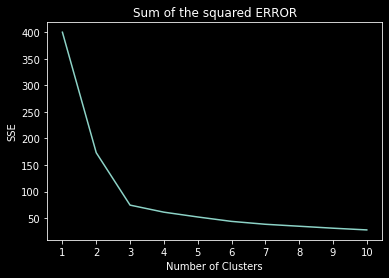

In [9]:
plt.style.use('dark_background')
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Sum of the squared ERROR")
plt.show()

In [10]:
kneeLocator = KneeLocator(
    range(1, 11), SSE, curve='convex', direction='decreasing',
)
kneeLocator.elbow

3

In [11]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

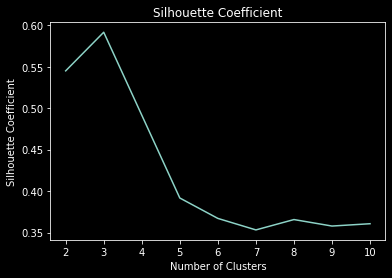

In [12]:
plt.style.use('dark_background')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient")
plt.show()